<a href="https://colab.research.google.com/github/surajss28/Data-Analysis-Project/blob/main/Zomato_Banglore_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project - Zomato Restaurants in Banglore

Data Source - kaggle.com

Desription : The data is taken from the kaggle data sheet for doing data analysis. The data is telling about Restaurants in Banglore which provide zomato service.




# **Data Cleaning & Preprocessing**

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading Data

In [6]:
df = pd.read_csv("/content/drive/MyDrive/zomato.csv")

In [7]:
df.head(5
        )

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
df.shape

(51717, 17)

In [9]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [11]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for_two_people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for_two_people)  51371 non-null  object
 13  reviews_list                 51

In [14]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


### Remove '/5' and convert to float in the 'rate' column


In [15]:
df['rate'] = df['rate'].replace('NEW', None)

In [16]:
df['rate'] = df['rate'].replace('-', None)

In [17]:
df['rate'] = df['rate'].str.replace('/5', '').str.strip()

In [18]:
df['rate'] = df['rate'].astype(float)

### Clean 'approx_cost(for_two_people)' column

In [19]:
df['approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].str.replace(',', '')

In [20]:
df['approx_cost(for_two_people)'] = pd.to_numeric(df['approx_cost(for_two_people)'], errors='coerce')

### Renaming columns

In [21]:
df.rename(columns={'listed_in(city)':'city_located', 'listed_in(type)':'type_of_restro'},inplace=True)

### Standardize yes/no values

In [22]:
df['online_order'] = df['online_order'].str.lower()

In [23]:
df['book_table'] = df['book_table'].str.lower()

### Add binary flags

In [24]:
df['has_online_delivery'] = df['online_order'].map({'yes': 1, 'no': 0})

In [25]:
df['has_table_booking'] = df['book_table'].map({'yes': 1, 'no': 0})

### Number of cuisines

In [26]:
df['num_cuisines'] = df['cuisines'].fillna('').apply(lambda x: len(x.split(',')))

### Price range

In [27]:
def categorize_price(val):
    if val < 300:
        return 'Low'
    elif val < 800:
        return 'Medium'
    else:
        return 'High'

In [63]:
df['price_range'] = df['approx_cost(for_two_people)'].apply(lambda x: categorize_price(x) if pd.notnull(x) else 'Unknown')

# **Phase 2: Exploratory Data Analysis (EDA)**

In [29]:
from collections import Counter

### Top 15 cuisines

In [30]:
cuisine_counts = Counter([c.strip() for cs in df['cuisines'].dropna() for c in cs.split(',')])

In [31]:
top_cuisines = dict(cuisine_counts.most_common(15))

<ipython-input-32-b6a94c5b9559>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_cuisines.values()), y=list(top_cuisines.keys()), palette='viridis')


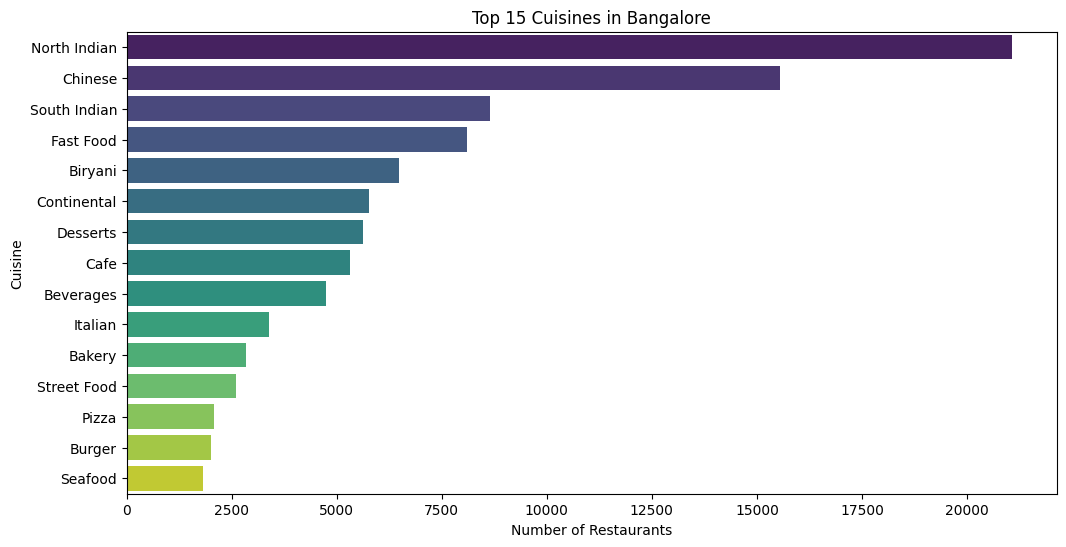

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(top_cuisines.values()), y=list(top_cuisines.keys()), palette='viridis')
plt.title('Top 15 Cuisines in Bangalore')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

### Top 15 Localities with Most Restaurants

In [33]:
top_locations = df['location'].value_counts().head(15)

<ipython-input-34-e5a912d15384>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')


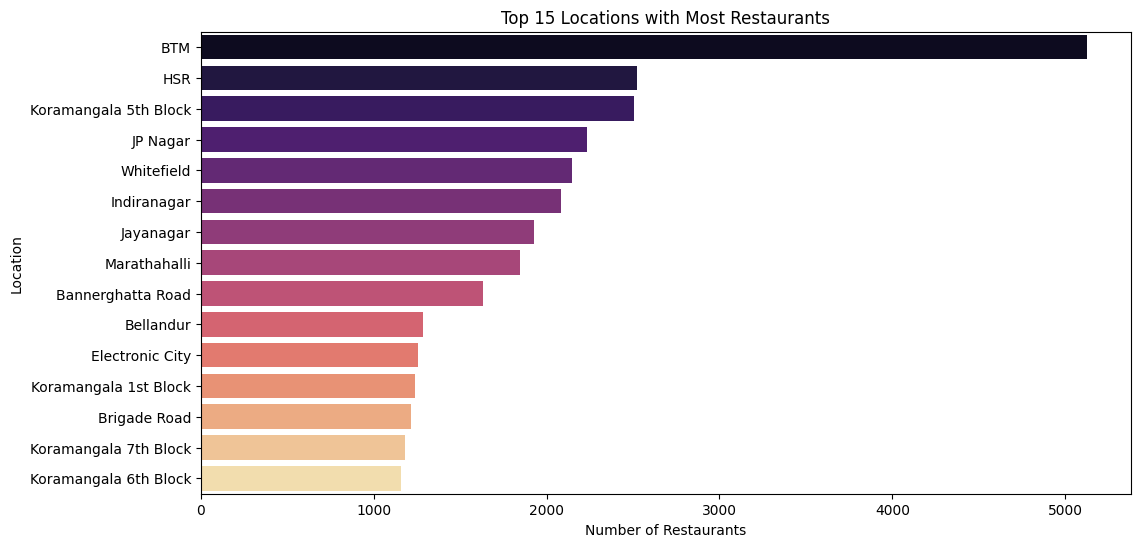

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')
plt.title('Top 15 Locations with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()

###  Rating Distribution

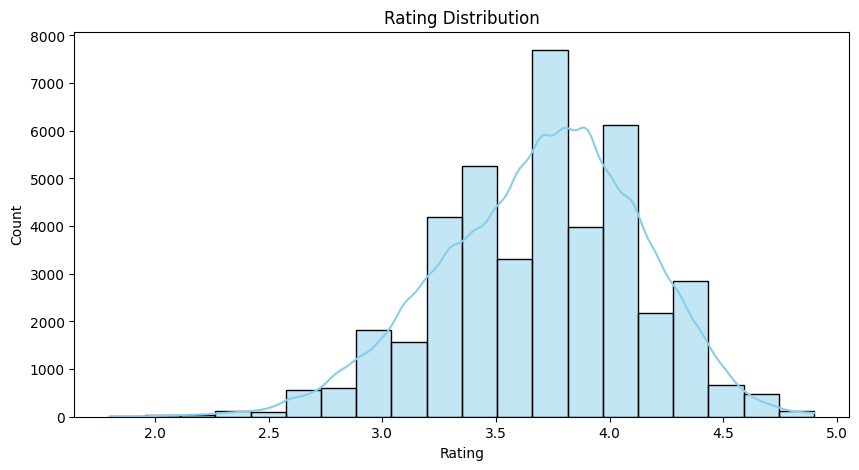

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(df['rate'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Price Range Distribution

<ipython-input-36-4d5dcb1756fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_range', order=['Low', 'Medium', 'High'], palette='pastel')


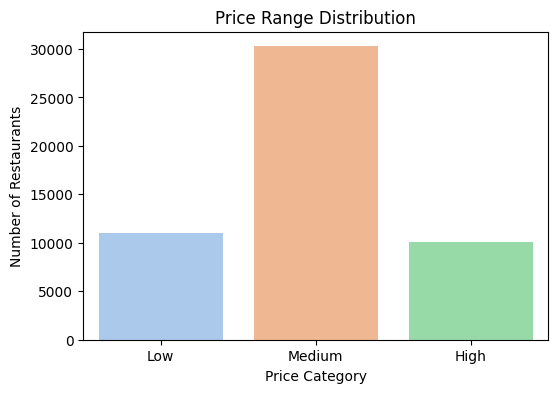

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='price_range', order=['Low', 'Medium', 'High'], palette='pastel')
plt.title('Price Range Distribution')
plt.xlabel('Price Category')
plt.ylabel('Number of Restaurants')
plt.show()

### Rating vs Cost

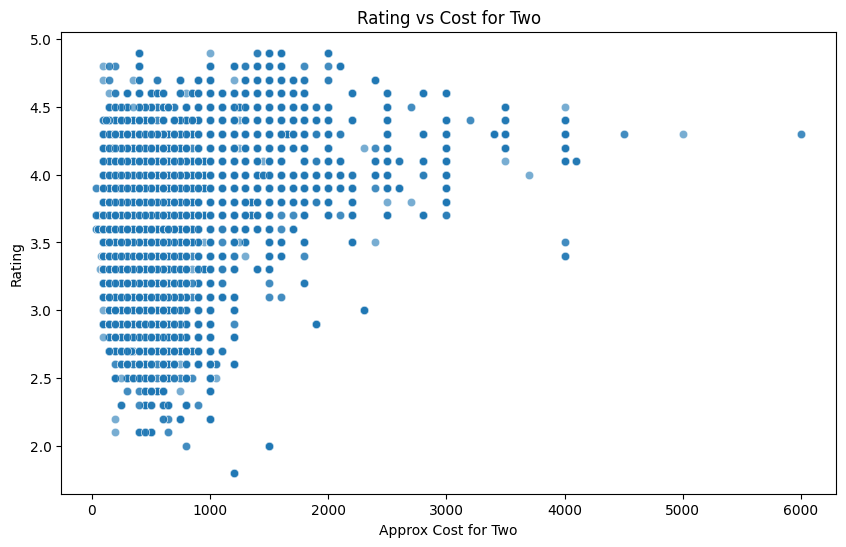

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='approx_cost(for_two_people)', y='rate', alpha=0.6)
plt.title('Rating vs Cost for Two')
plt.xlabel('Approx Cost for Two')
plt.ylabel('Rating')
plt.show()

### Online Delivery Impact on Rating

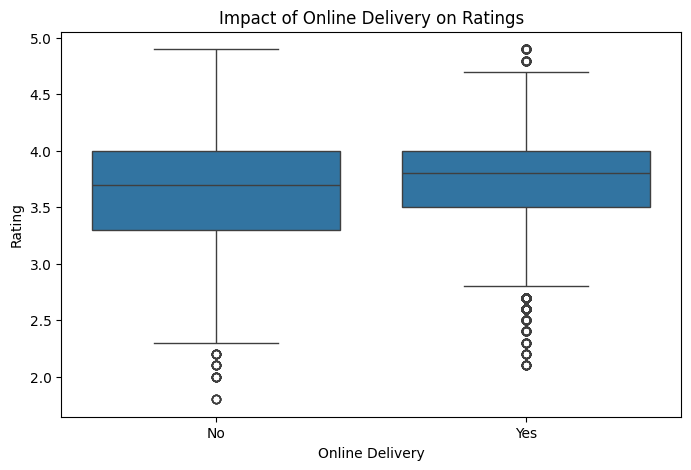

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='has_online_delivery', y='rate')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Impact of Online Delivery on Ratings')
plt.xlabel('Online Delivery')
plt.ylabel('Rating')
plt.show()

## Cuisine vs Average Rating

### Average rating per cuisine (top 10 only)

In [39]:
cuisine_ratings = {}
for cs, rating in zip(df['cuisines'], df['rate']):
    if pd.notnull(cs) and pd.notnull(rating):
        for c in cs.split(','):
            c = c.strip()
            cuisine_ratings.setdefault(c, []).append(rating)

### Compute average

In [40]:
avg_cuisine_rating = {k: sum(v)/len(v) for k, v in cuisine_ratings.items() if len(v) > 50}  # filter low-counts
sorted_avg = dict(sorted(avg_cuisine_rating.items(), key=lambda x: x[1], reverse=True)[:10])

<ipython-input-41-1ae2028dcefb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_avg.values()), y=list(sorted_avg.keys()), palette='cubehelix')


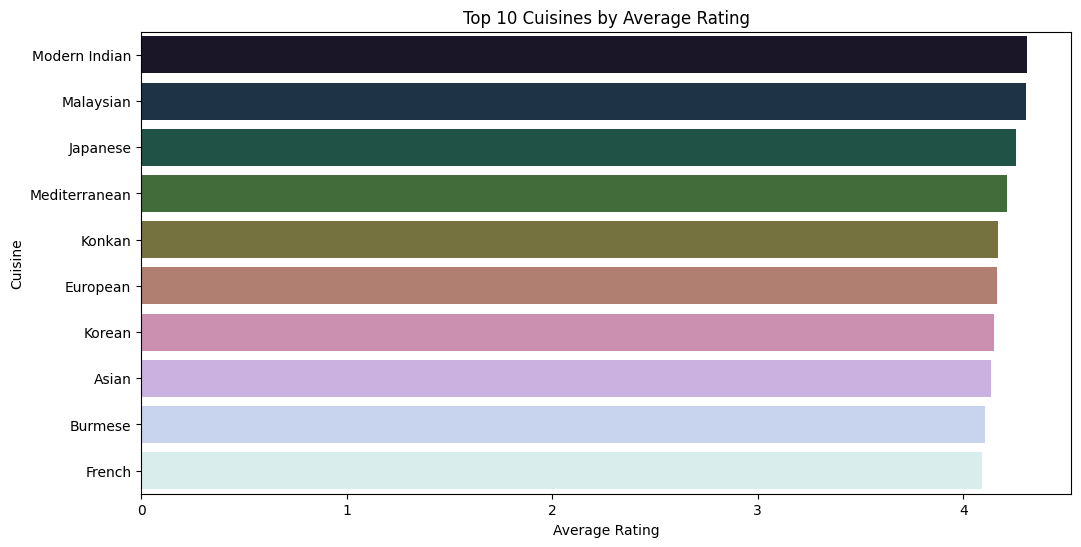

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(sorted_avg.values()), y=list(sorted_avg.keys()), palette='cubehelix')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

## Locality vs Average Cost

### Group by location

In [42]:
loc_cost = df.groupby('location')['approx_cost(for_two_people)'].mean().sort_values(ascending=False).head(10)

<ipython-input-43-8a84237a53f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc_cost.values, y=loc_cost.index, palette='rocket')


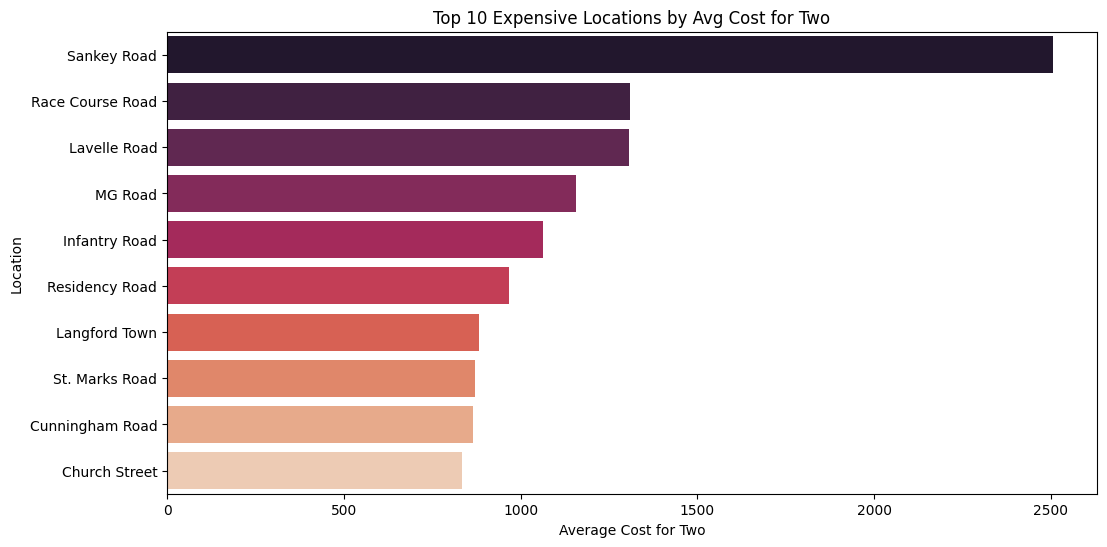

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x=loc_cost.values, y=loc_cost.index, palette='rocket')
plt.title('Top 10 Expensive Locations by Avg Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Location')
plt.show()

## Online Delivery Availability by Locality

In [44]:
delivery_by_loc = df.groupby('location')['has_online_delivery'].mean().sort_values(ascending=False).head(10)

<ipython-input-45-6fa9d6d96566>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_by_loc.values * 100, y=delivery_by_loc.index, palette='Set2')


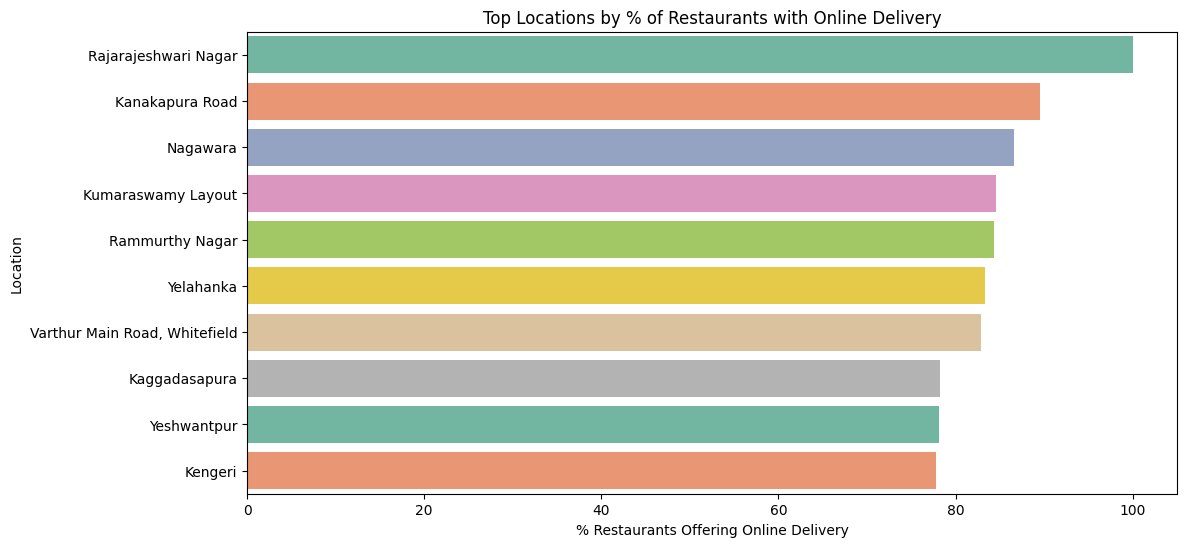

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(x=delivery_by_loc.values * 100, y=delivery_by_loc.index, palette='Set2')
plt.title('Top Locations by % of Restaurants with Online Delivery')
plt.xlabel('% Restaurants Offering Online Delivery')
plt.ylabel('Location')
plt.show()

## Correlation Heatmap

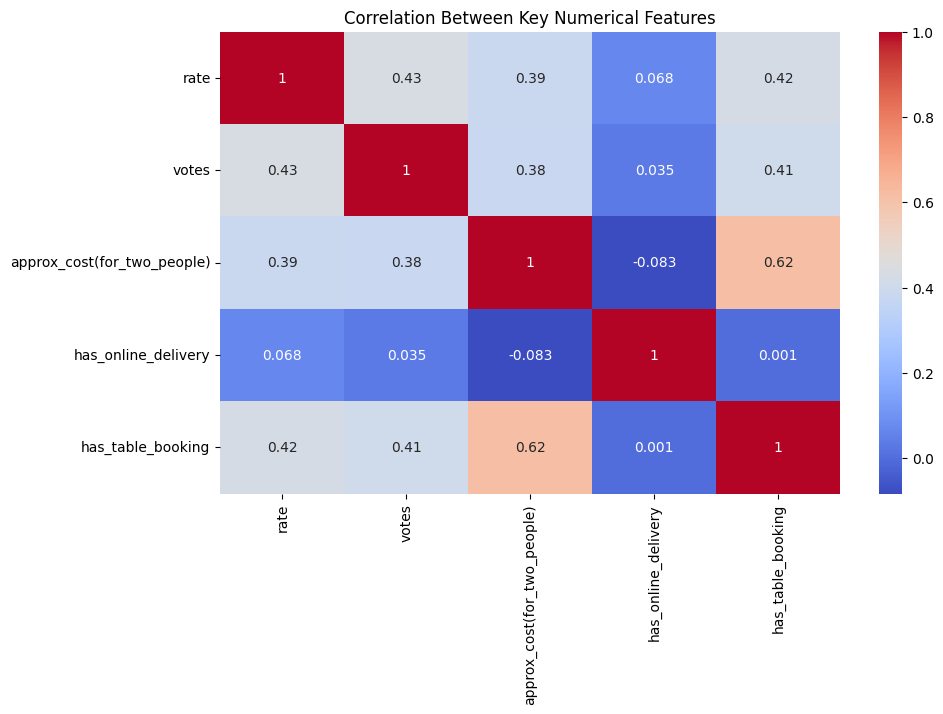

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['rate', 'votes', 'approx_cost(for_two_people)', 'has_online_delivery', 'has_table_booking']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Between Key Numerical Features')
plt.show()

## Highest Rated Restaurants (Min. 500 Votes)

In [47]:
top_rated = df[df['votes'] > 500].sort_values(by='rate', ascending=False)[['name', 'location', 'rate', 'votes', 'cuisines']].head(10)
top_rated

,name,location,rate,votes,cuisines
9099,Asia Kitchen By Mainland China,Koramangala 5th Block,4.9,2178,"Asian, Chinese, Thai, Momos"
51042,Flechazo,Whitefield,4.9,3004,"Asian, Mediterranean, North Indian, BBQ"
21770,AB's - Absolute Barbecues,BTM,4.9,6404,"European, Mediterranean, North Indian, BBQ"
37099,AB's - Absolute Barbecues,BTM,4.9,6490,"European, Mediterranean, North Indian, BBQ"
35082,Asia Kitchen By Mainland China,Koramangala 5th Block,4.9,2249,"Asian, Chinese, Thai, Momos"
40095,Punjab Grill,Malleshwaram,4.9,1940,"North Indian, Mughlai"
14740,Belgian Waffle Factory,Brigade Road,4.9,1743,Desserts
8260,AB's - Absolute Barbecues,BTM,4.9,6375,"European, Mediterranean, North Indian, BBQ"
18496,Milano Ice Cream,Indiranagar,4.9,2090,"Ice Cream, Desserts"
7888,Flechazo,Whitefield,4.9,2745,"Asian, Mediterranean, North Indian, BBQ"


## Impact of Online Ordering on Key Metrics

### Online Order Availability (Overall)

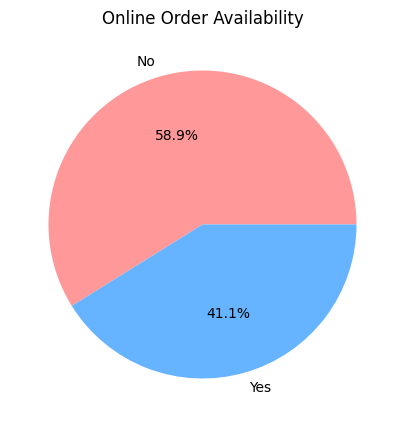

In [62]:
online_order_counts = df['has_online_delivery'].value_counts()

labels = ['No', 'Yes']
plt.figure(figsize=(5,5))
plt.pie(online_order_counts, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Online Order Availability')
plt.show()

### Online Order vs. Average Rating




In [58]:
df.groupby('has_online_delivery')['rate'].mean().rename({0: 'No', 1: 'Yes'})

,rate
has_online_delivery,
No,3.65907
Yes,3.72244


### Online Order vs. Number of Votes

In [59]:
df.groupby('has_online_delivery')['votes'].mean().rename({0: 'No', 1: 'Yes'})

,votes
has_online_delivery,
No,250.31594
Yes,307.02319


### Online Order vs. Average Cost for Two

In [60]:
df.groupby('has_online_delivery')['approx_cost(for_two_people)'].mean().rename({0: 'No', 1: 'Yes'})

,approx_cost(for_two_people)
has_online_delivery,
No,599.463803
Yes,525.164105


## Table Booking Availability (Overall)

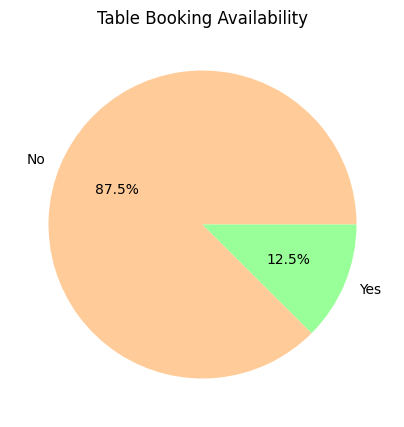

In [61]:
table_booking_counts = df['has_table_booking'].value_counts()

labels = ['No', 'Yes']
plt.figure(figsize=(5,5))
plt.pie(table_booking_counts, labels=labels, autopct='%1.1f%%', colors=['#ffcc99','#99ff99'])
plt.title('Table Booking Availability')
plt.show()

## Restaurant Types and Their Count

<ipython-input-50-fa6d74dc6d1c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rest_types.values, y=top_rest_types.index, palette='Blues_d')


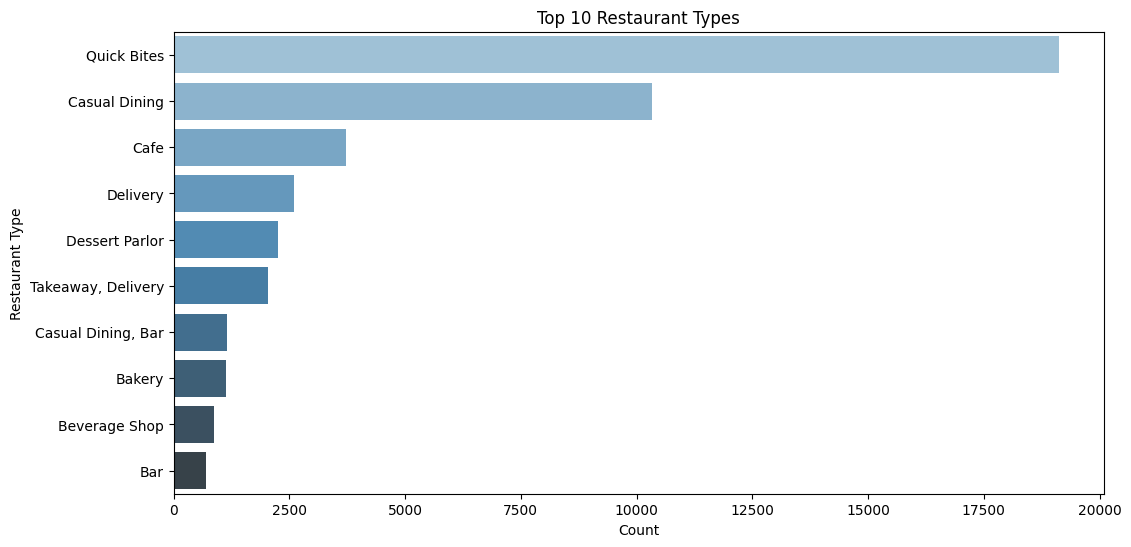

In [50]:
top_rest_types = df['rest_type'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_rest_types.values, y=top_rest_types.index, palette='Blues_d')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()

### Which Dishes Got the Most Likes

<ipython-input-51-1b395edbc75e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dishes.values, y=top_dishes.index, palette='cool')


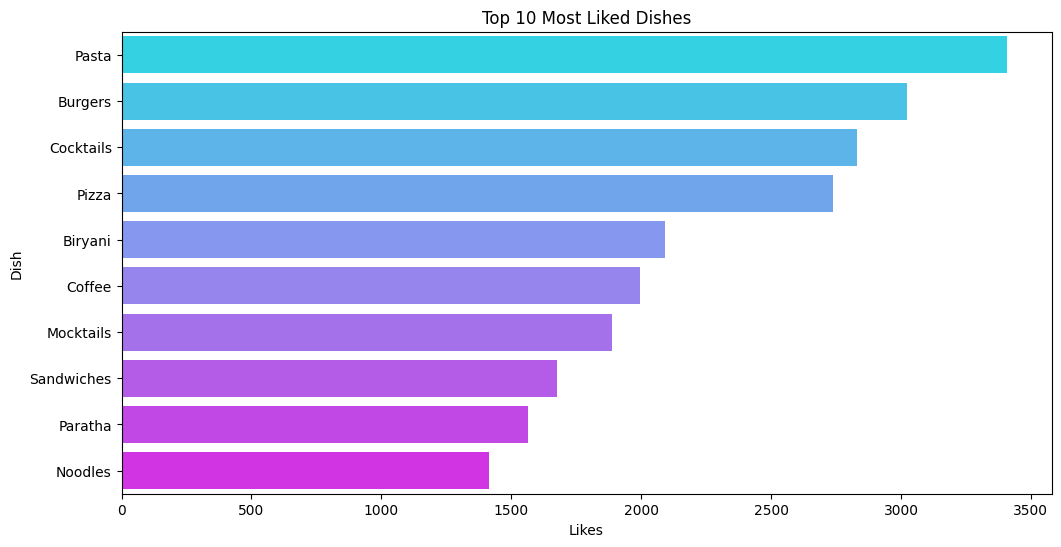

In [51]:
top_dishes = df['dish_liked'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_dishes.values, y=top_dishes.index, palette='cool')
plt.title('Top 10 Most Liked Dishes')
plt.xlabel('Likes')
plt.ylabel('Dish')
plt.show()

##Insights



### 59% of Restaurants in Banglore are taking online orders through Zomato.

### Restaurants offering online ordering have slightly higher average ratings.

### Restaurants with online delivery usually receive significantly more votes.

### Restaurants offering delivery tend to have lower or moderate average cost.


### Only 12.5% of restaurants has table booking facility suggest that restaurants are experiencing high demand and is likely very busy.

### 'Quick Bites' type restaurants which are often known as fast food restaurants has highest count followed by 'Casual dinning'.

### Pasta, Burgers, Pizza and Biryani are the most liked dishesh.

###most of the votes are given to the cafe type reastaurants and casual dining. So we can say that people are enjoying the cafes most.

###Restaurants near airports are expensive.

###Average cost for 2 people in banglore is around 550.

###BTM location has highest number of restaurants.

###BTM city has most Number of restaurants

###We can conclude that North Indian, Chinese and South Indian food are prepared most.
